In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_torch = pd.read_csv('torch_issues_classified.csv')
df_tf = pd.read_csv('tf_issues_classified.csv')

### PyTorch 

In [9]:
df_torch['Time created'].isnull().sum()

0

In [10]:
#Graph the number of bugs over time
df_torch['Time created'] = pd.to_datetime(df_torch['Time created'])
df_torch['Time created'] = df_torch['Time created'].dt.strftime('%Y-%m-%d')
df_torch['Final_Is_Bug'] = df_torch['Final_Is_Bug'].astype(int)

In [11]:
#sort by date the df_torch
df_torch_sorted = df_torch.sort_values(by=['Time created'])

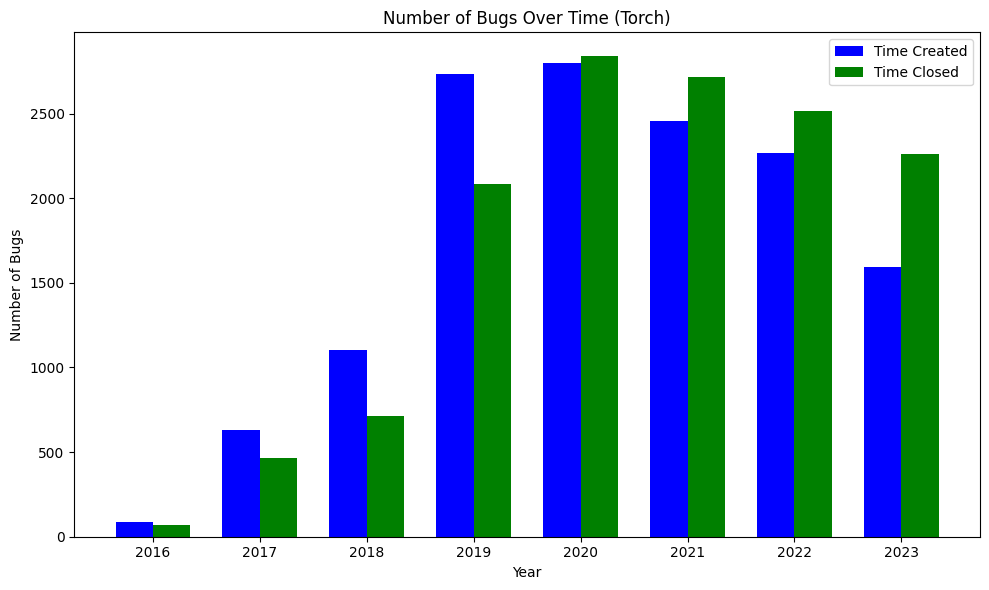

In [12]:
import matplotlib.pyplot as plt

# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and count the number of bugs for Time Created
bugs_per_year_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time created'].dt.year).size()

# Group by year and count the number of bugs for Time Closed
bugs_per_year_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time closed'].dt.year).size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar
bar_width = 0.35

# Calculate the x positions for the bars
x = np.arange(len(bugs_per_year_created.index))

# Plotting for Time Created
ax.bar(x - bar_width/2, bugs_per_year_created.values, width=bar_width, color='blue', label='Time Created')

# Plotting for Time Closed
ax.bar(x + bar_width/2, bugs_per_year_closed.values, width=bar_width, color='green', label='Time Closed')

# Set titles and labels
ax.set_title('Number of Bugs Over Time (Torch)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.set_xticks(x)
ax.set_xticklabels(bugs_per_year_created.index)
ax.legend()

plt.tight_layout()
plt.show()


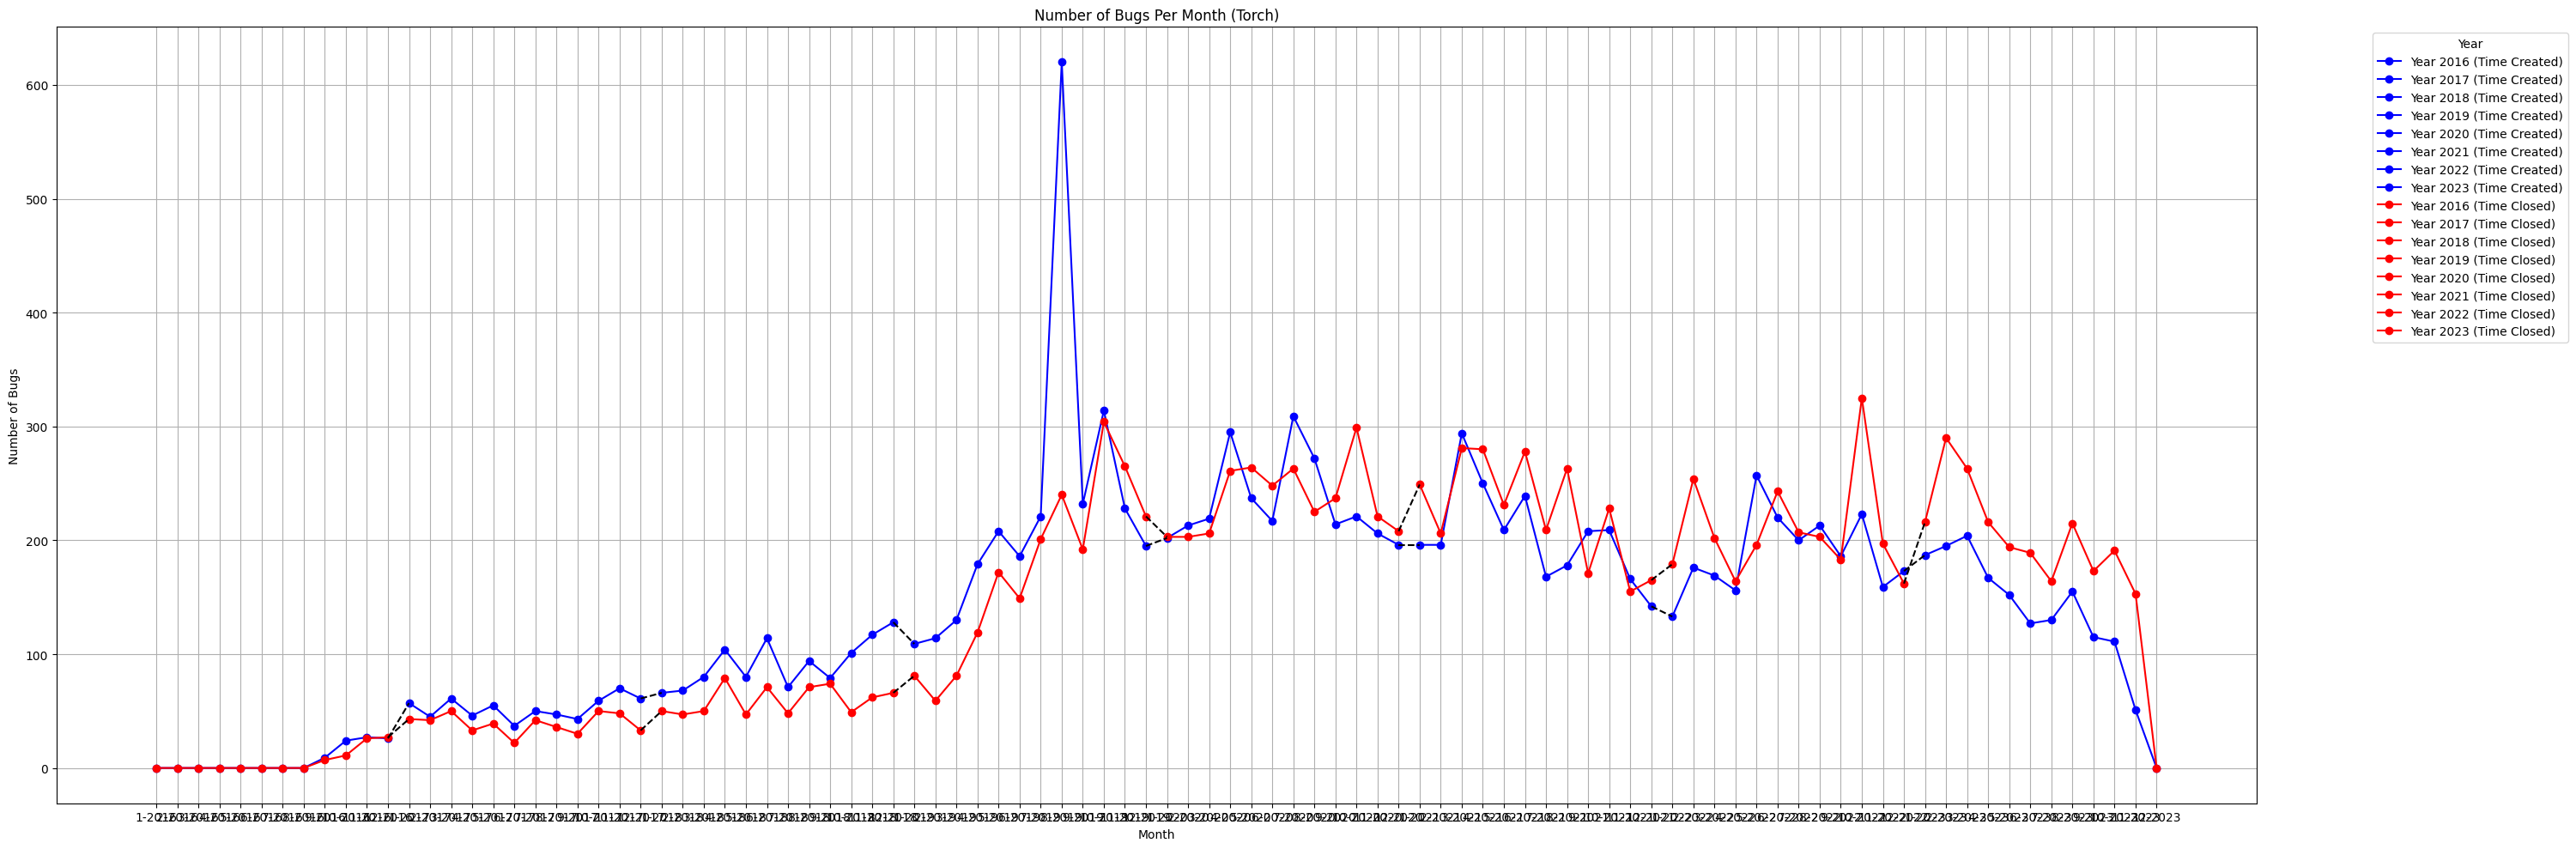

In [13]:
# Create subplots
fig, ax = plt.subplots(figsize=(30, 10))

# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month]).size()

# Group by year and month and count the number of bugs for Time Closed
bugs_per_month_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time closed'].dt.year, df_torch_sorted['Time closed'].dt.month]).size()

# Sort the bugs_per_month_created DataFrame by month in ascending order
bugs_per_month_created = bugs_per_month_created.sort_index()
bugs_per_month_closed = bugs_per_month_closed.sort_index()

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o', color='blue')

# Plotting for Time Closed
for year in bugs_per_month_closed.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_closed.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Closed)', marker='o', color='red')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Connect the months between different years for Time Closed
for i in range(len(bugs_per_month_closed.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_closed.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_closed.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_closed.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_closed.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_closed.loc[current_year].get(current_year_last_month, 0), bugs_per_month_closed.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Torch)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

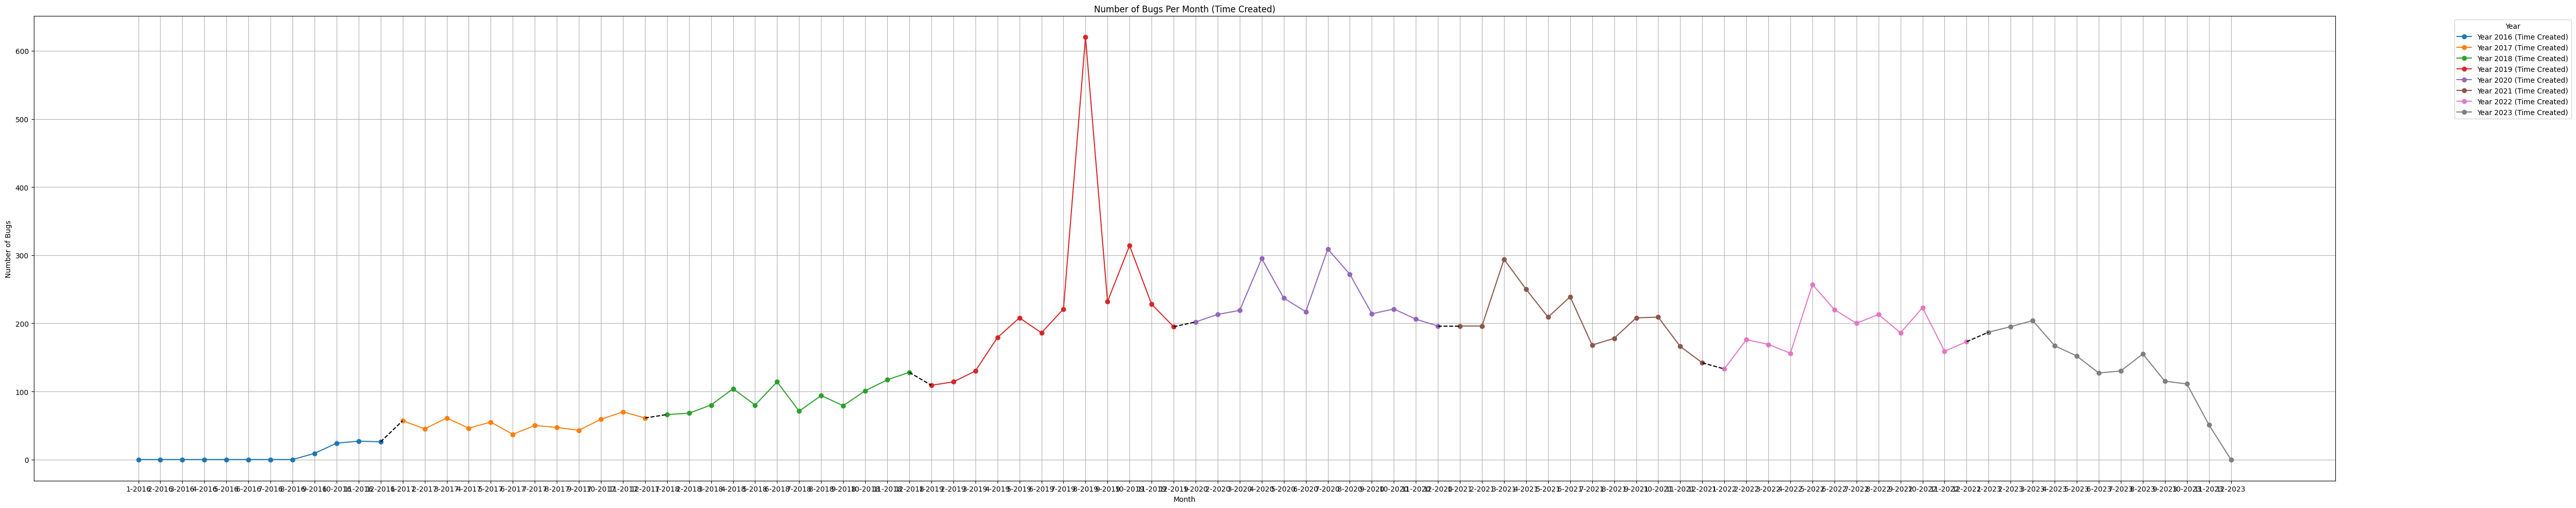

In [14]:
# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Time Created)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

### TensorFlow

In [15]:
df_tf['Time created'].isnull().sum()

0

In [16]:
#Graph the number of bugs over time
df_tf['Time created'] = pd.to_datetime(df_tf['Time created'])
df_tf['Time created'] = df_tf['Time created'].dt.strftime('%Y-%m-%d')
df_tf['Final_Is_Bug'] = df_tf['Final_Is_Bug'].astype(int)

In [17]:
#sort by date the df_torch
df_tf_sorted = df_tf.sort_values(by=['Time created'])

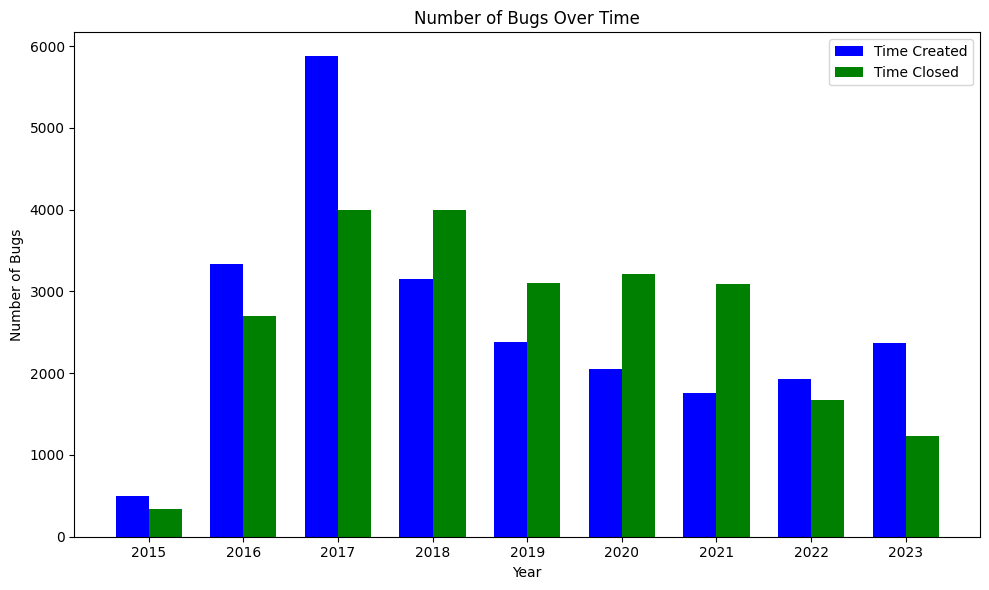

In [18]:
# Assuming df_tf_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and count the number of bugs for Time Created
bugs_per_year_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time created'].dt.year).size()

# Group by year and count the number of bugs for Time Closed
bugs_per_year_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time closed'].dt.year).size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar
bar_width = 0.35

# Calculate the x positions for the bars
x = np.arange(len(bugs_per_year_created.index))

# Plotting for Time Created
ax.bar(x - bar_width/2, bugs_per_year_created.values, width=bar_width, color='blue', label='Time Created')

# Plotting for Time Closed
ax.bar(x + bar_width/2, bugs_per_year_closed.values, width=bar_width, color='green', label='Time Closed')

# Set titles and labels
ax.set_title('Number of Bugs Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.set_xticks(x)
ax.set_xticklabels(bugs_per_year_created.index)
ax.legend()

plt.tight_layout()
plt.show()


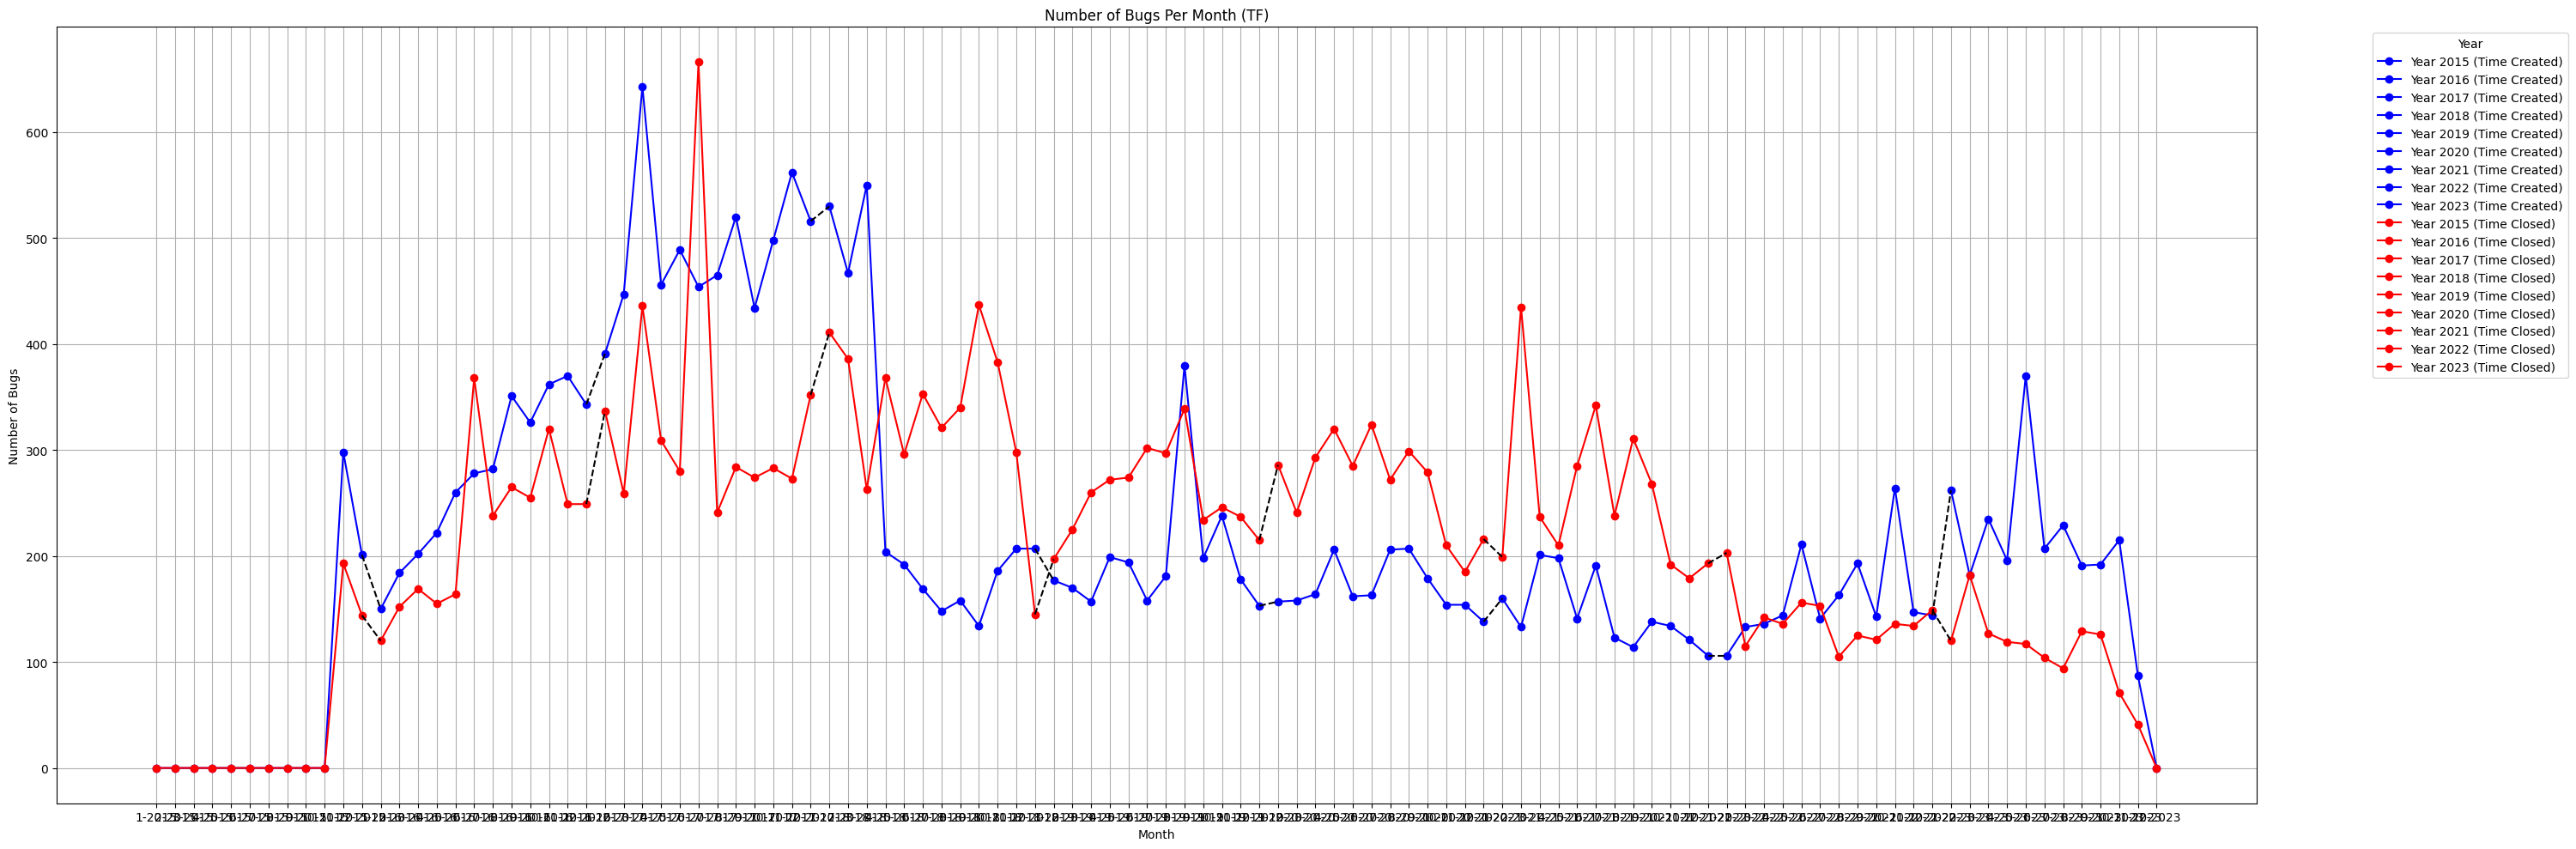

In [19]:
# Assuming df_tf_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month]).size()

# Group by year and month and count the number of bugs for Time Closed
bugs_per_month_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time closed'].dt.year, df_tf_sorted['Time closed'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(30, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o', color='blue')

# Plotting for Time Closed
for year in bugs_per_month_closed.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_closed.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Closed)', marker='o', color='red')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Connect the months between different years for Time Closed
for i in range(len(bugs_per_month_closed.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_closed.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_closed.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_closed.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_closed.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_closed.loc[current_year].get(current_year_last_month, 0), bugs_per_month_closed.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (TF)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

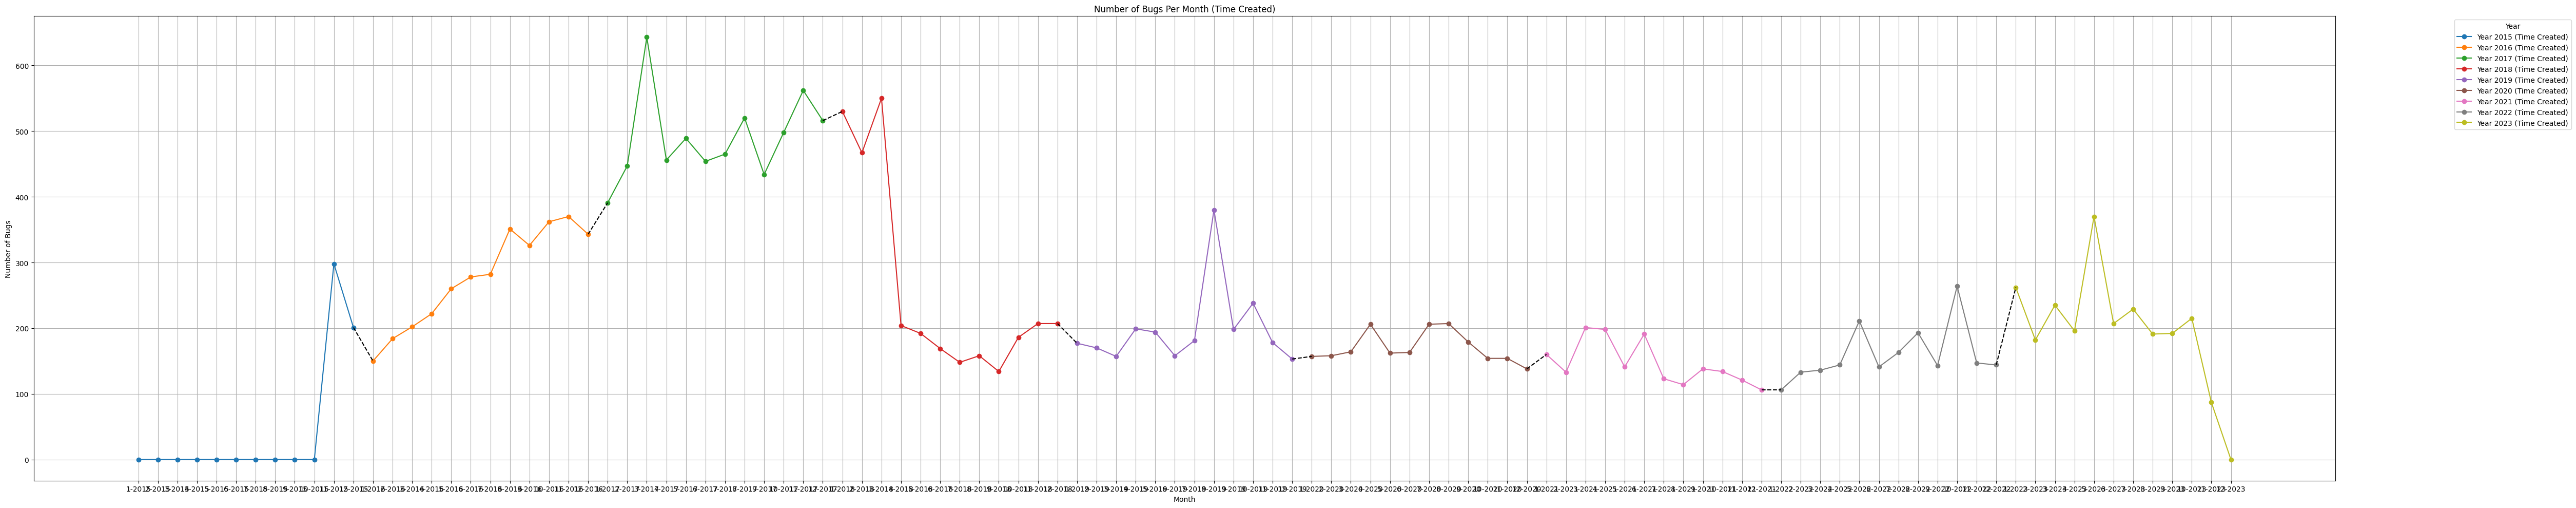

In [20]:
# Assuming df_torch_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month]).size()

# Sort the bugs_per_month_created DataFrame by month in ascending order
bugs_per_month_created = bugs_per_month_created.sort_index()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Time Created)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()